## Question 1A
Take grayscale image of size 512*512 and decrease its spatial resulation by half every time and observe its change when displaying in the same window size. 

In [2]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

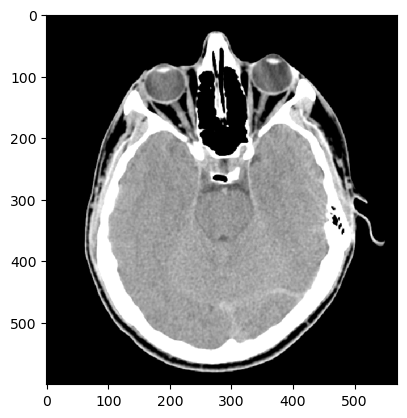

In [14]:
# reading image
#original_image = plt.imread('peppers2.tif').copy()
original_image = Image.open('head.tif').copy()
plt.imshow(original_image, cmap='gray')

### By Using Pre-Defined Methods of PIL

/tmp/ipykernel_11072/283430764.py:16: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_image = resized_image.resize((resized_image.width//2, resized_image.height//2), Image.ANTIALIAS)


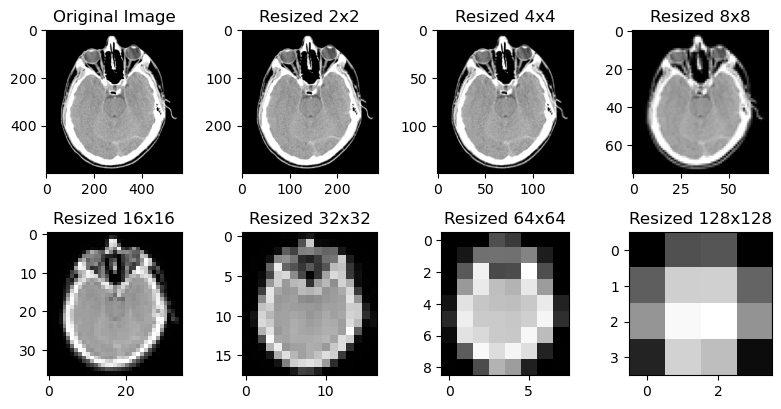

In [15]:
# Define the window size for display
window_size = (512, 512)

# Create a figure to display the images
plt.figure(figsize=(8, 8))

# Display the original image in the first subplot
plt.subplot(4, 4, 1)
plt.imshow(original_image, cmap='gray')
plt.title("Original Image")
#plt.axis('off')

# Iterate to decrease spatial resolution and display
resized_image = original_image.copy()
for i in range(1, 8):
    resized_image = resized_image.resize((resized_image.width//2, resized_image.height//2), Image.ANTIALIAS)
    #resized_image = resize_image_by_half(resized_image)

    # Display the resized image in subsequent subplots
    plt.subplot(4, 4, i + 1)
    plt.imshow(resized_image, cmap='gray')
    plt.title(f"Resized {2 ** i}x{2 ** i}")
    #plt.axis('off')

plt.tight_layout()
plt.show()

### By Own implemented Function

In [5]:
def resize_image_by_half(input_image):
    in_height, in_width = input_image.shape

    scaling_factor = 2
    out_height = in_height//scaling_factor
    out_width = in_width//scaling_factor

    pix_x = 0
    pix_y = 0
    output_image = np.zeros([out_height, out_width], dtype='uint8')

    for x in range(out_width):
        pix_x = x*scaling_factor
        for y in range(out_height):
            pix_y = y*scaling_factor
            output_image[x][y] = input_image[pix_x][pix_y]

    return output_image

In [6]:
def make_up_down_sampling(image, sampling_factor=2, type=0):
    # type=0 -> downsampling
    # type=1 -> upsampling
    if type == 0:
        new_height = int(image.shape[0] // sampling_factor)
        new_width = int(image.shape[1] // sampling_factor)
    else:
        new_height = int(image.shape[0] * sampling_factor)
        new_width = int(image.shape[1] * sampling_factor)

    sampled_image = np.empty((new_height, new_width), dtype=image.dtype)
    for y in range(new_height):
        for x in range(new_width):
            if type == 0:
                original_x = int(x * sampling_factor)
                original_y = int(y * sampling_factor)
            else:
                original_x = int(x // sampling_factor)
                original_y = int(y // sampling_factor)

            sampled_image[y, x] = image[original_y, original_x]

    return sampled_image

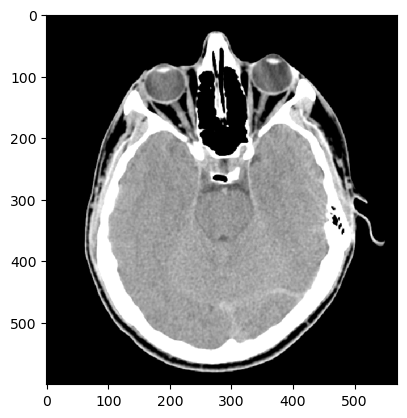

In [7]:
second_image  = plt.imread('head.tif')
plt.imshow(second_image, cmap="gray")

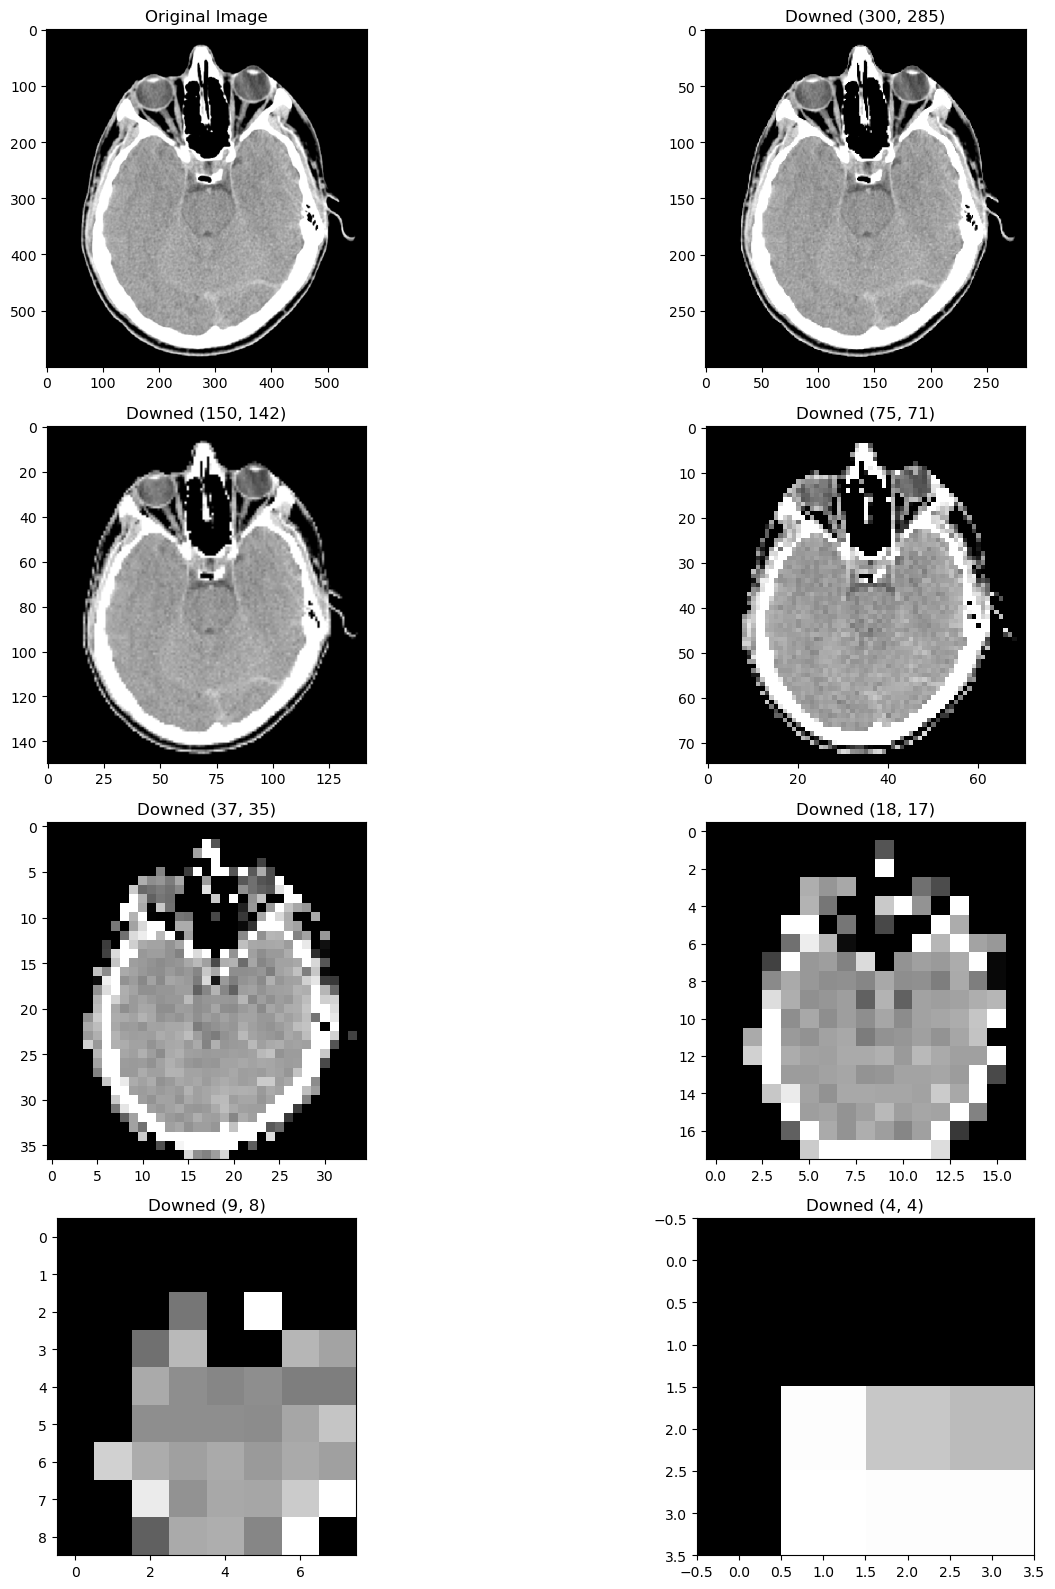

In [10]:
# Define the window size for display
window_size = (512, 512)

# Create a figure to display the images
plt.figure(figsize=(16, 16))

# Display the original image in the first subplot
plt.subplot(4, 2, 1)
plt.imshow(second_image, cmap='gray')
plt.title("Original Image")
#plt.axis('off')

# Iterate to decrease spatial resolution and display
resized_image = second_image.copy()
for i in range(1, 8):
    resized_image = make_up_down_sampling(resized_image)

    # Display the resized image in subsequent subplots
    plt.subplot(4, 2, i + 1)
    plt.imshow(resized_image, cmap='gray')
    plt.title(f"Downed {resized_image.shape}")
    #plt.axis('off')

plt.tight_layout()
plt.show()